In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt

In [2]:

# Load datasets
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")


In [3]:
# Merge customer and transaction data
customer_transactions = pd.merge(transactions, customers, on='CustomerID')

# Aggregate transaction data by customer
customer_agg = customer_transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total spending by the customer
    'Quantity': 'sum',    # Total quantity of products purchased
    'Price': 'mean'       # Average price of products purchased
}).reset_index()

# Merge with customer profile data
customer_profile = pd.merge(customers, customer_agg, on='CustomerID')

# Encode categorical variables (Region) using one-hot encoding
customer_profile = pd.get_dummies(customer_profile, columns=['Region'], drop_first=True)

# Select features for clustering
X = customer_profile[['TotalValue', 'Quantity', 'Price'] + list(customer_profile.columns[customer_profile.columns.str.startswith('Region_')])]

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


C:\Users\valle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\valle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\valle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\valle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

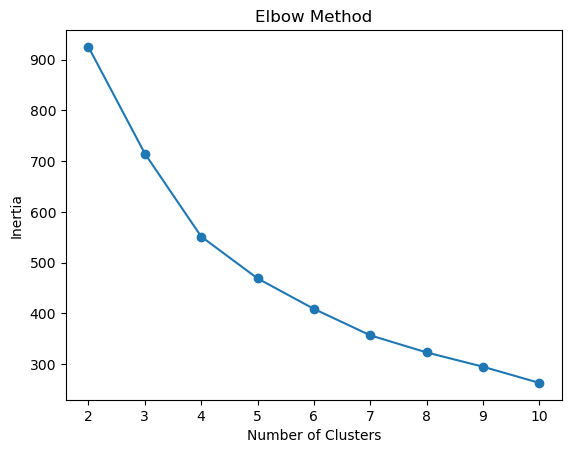

In [5]:

# Plot the Elbow Method
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [6]:
# Choose the optimal number of clusters (e.g., k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
customer_profile['Cluster'] = kmeans.fit_predict(X_scaled)

# Calculate DB Index
db_index = davies_bouldin_score(X_scaled, customer_profile['Cluster'])
print(f"DB Index: {db_index}")

C:\Users\valle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\valle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


DB Index: 1.1736528463634648
